In [284]:
import pandas as pd
import matplotlib.pyplot as plt

In [285]:
csv = pd.read_csv("ADNIMERGE_29Nov2024.csv")

csv["PTRACCAT"] = csv["PTRACCAT"].apply(lambda x: "Bianchi" if x == "White" else "Non Bianchi")

C:\Users\A1149apulia\AppData\Local\Temp\ipykernel_16436\1973809282.py:1: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv("ADNIMERGE_29Nov2024.csv")


In [286]:
csv["PTRACCAT"].unique()

array(['Bianchi', 'Non Bianchi'], dtype=object)

In [287]:
race_dx_bl = csv.groupby("PTRACCAT")["DX_bl"].value_counts().unstack()
race_dx = csv.groupby("PTRACCAT")["DX"].value_counts().unstack()

print(f"Distribuzione delle DX_bl x PTRACCAT:\n {race_dx_bl}")

Distribuzione delle DX_bl x PTRACCAT:
 DX_bl          AD    CN  EMCI  LMCI   SMC
PTRACCAT                                 
Bianchi      1626  4468  2779  4948  1272
Non Bianchi   125   436   216   327   213


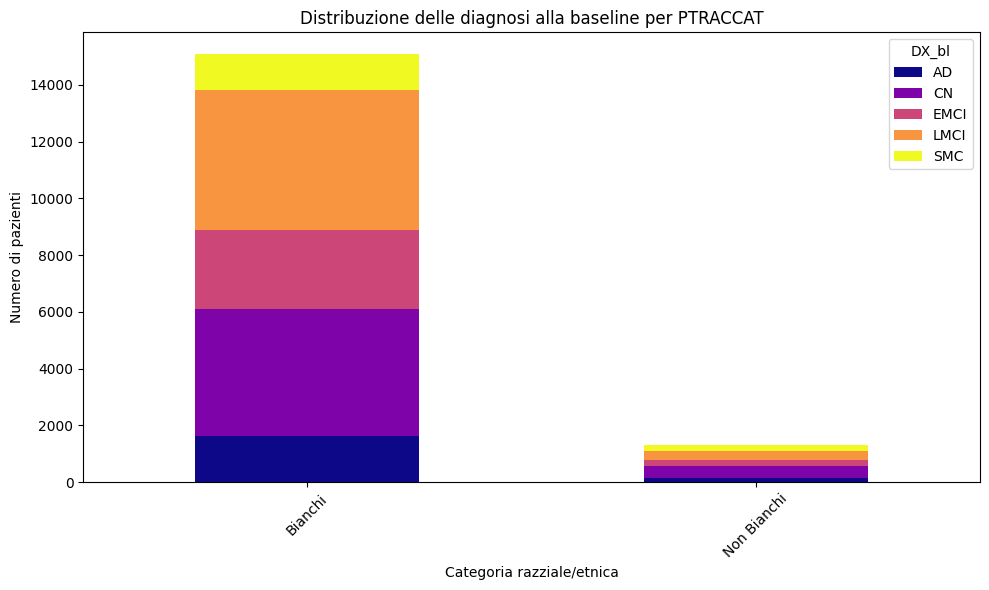

In [288]:
race_dx_bl.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Distribuzione delle diagnosi alla baseline per PTRACCAT')
plt.xlabel('Categoria razziale/etnica')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [289]:
print(f"Distribuzione delle DX x PTRACCAT:\n {race_dx}")

Distribuzione delle DX x PTRACCAT:
 DX             CN  Dementia   MCI
PTRACCAT                         
Bianchi      3592      2294  4647
Non Bianchi   428       155   342


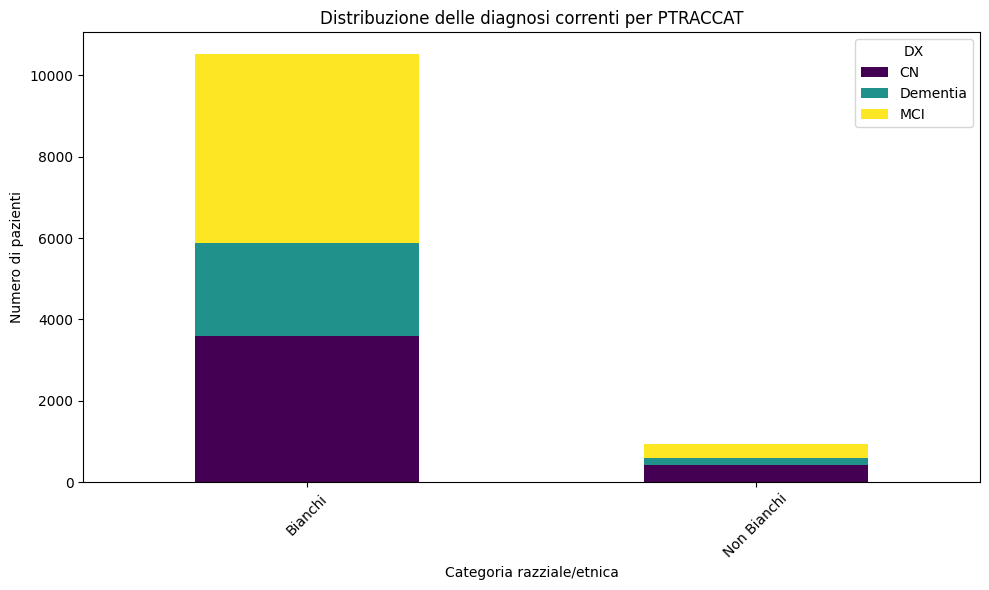

In [290]:
race_dx.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribuzione delle diagnosi correnti per PTRACCAT')
plt.xlabel('Categoria razziale/etnica')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [291]:
csv['PTMARRY'] = csv['PTMARRY'].apply(
    lambda x: 'Sposati' if x == 'Married' 
    else 'Non sposati' if x in ['Divorced', 'Widowed'] 
    else 'Unknown'
)

In [292]:
csv['PTMARRY'].unique()

array(['Sposati', 'Non sposati', 'Unknown'], dtype=object)

In [293]:
marry_dx_bl = csv.groupby("PTMARRY")["DX_bl"].value_counts().unstack()
marry_dx = csv.groupby("PTMARRY")["DX"].value_counts().unstack()

print(f"Distribuzione di DX_bl per PTMARRY:\n{marry_dx_bl}")

Distribuzione di DX_bl per PTMARRY:
DX_bl          AD    CN  EMCI  LMCI   SMC
PTMARRY                                  
Non sposati   232  1159   548  1020   324
Sposati      1470  3499  2305  4177  1067
Unknown        49   246   142    78    94


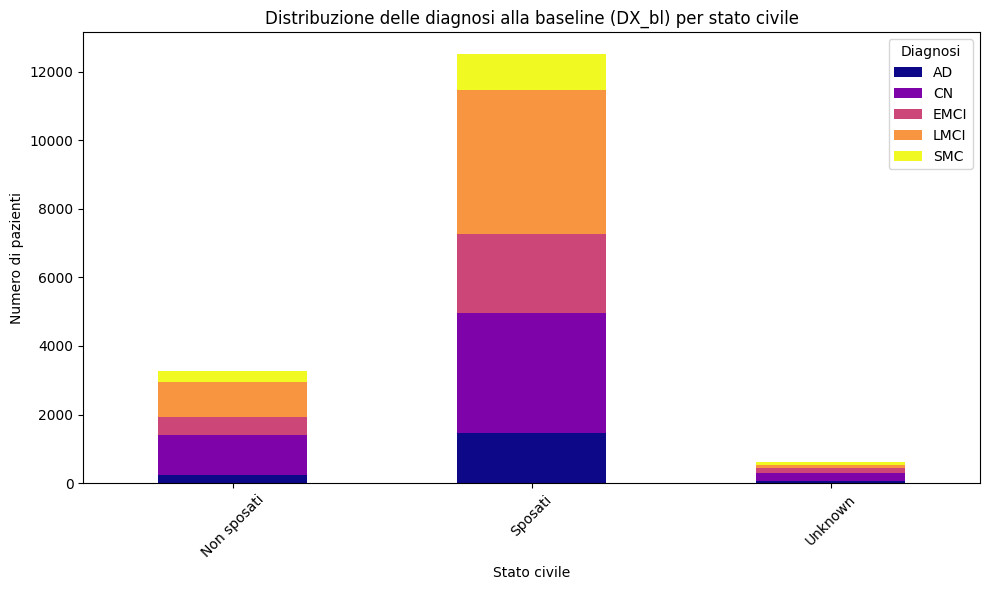

In [294]:
marry_dx_bl.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Distribuzione delle diagnosi alla baseline (DX_bl) per stato civile')
plt.xlabel('Stato civile')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.legend(title='Diagnosi')
plt.tight_layout()
plt.show()

In [295]:
print(f"Distribuzione di DX per PTMARRY:\n{marry_dx}")

Distribuzione di DX per PTMARRY:
DX             CN  Dementia   MCI
PTMARRY                          
Non sposati   920       360  1011
Sposati      2878      2037  3817
Unknown       222        52   161


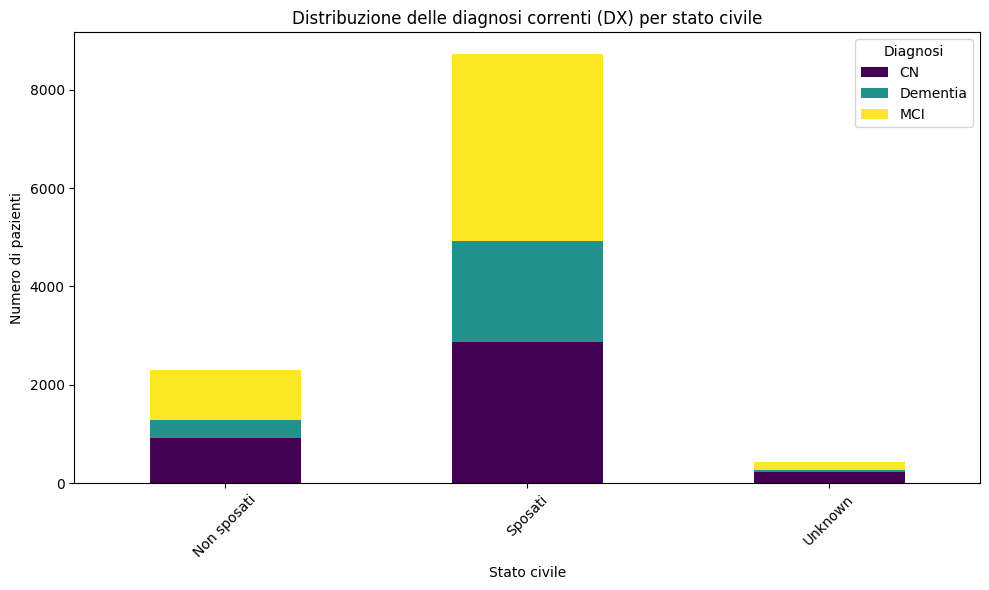

In [296]:
marry_dx.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribuzione delle diagnosi correnti (DX) per stato civile')
plt.xlabel('Stato civile')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45)
plt.legend(title='Diagnosi')
plt.tight_layout()
plt.show()

<b> ANALISI E APPROFONDIMENTO SULLA PROGRESSIONE DELLE DIAGNOSI </b>

In [297]:
csv["PRIMARY_KEY"] = csv["PTID"] + "_" + csv["VISCODE"]

In [298]:
filtered_table = csv[["RID", "PRIMARY_KEY", "PTID", "VISCODE", "EXAMDATE", "DX_bl", "DX"]]

print(filtered_table.head())

   RID     PRIMARY_KEY        PTID VISCODE    EXAMDATE DX_bl        DX
0    2   011_S_0002_bl  011_S_0002      bl  2005-09-08    CN        CN
1    3   011_S_0003_bl  011_S_0003      bl  2005-09-12    AD  Dementia
2    3  011_S_0003_m06  011_S_0003     m06  2006-03-13    AD  Dementia
3    3  011_S_0003_m12  011_S_0003     m12  2006-09-12    AD  Dementia
4    3  011_S_0003_m24  011_S_0003     m24  2007-09-12    AD  Dementia


In [299]:
filtered_table.to_csv("filtered_table.csv", index=False)

In [300]:
filtered_table["DX"].value_counts()

DX
MCI         4989
CN          4020
Dementia    2449
Name: count, dtype: int64

In [301]:
print(f"totale {2449+4020+4989}")

totale 11458


Quindi 4963 sono i pazienti senza una diagnosi corrente.

In [302]:
filtered_table["DX_bl"].value_counts()

DX_bl
LMCI    5275
CN      4904
EMCI    2995
AD      1751
SMC     1485
Name: count, dtype: int64

In [303]:
print(f"totale {5275+4904+2995+1751+1485}")

totale 16410


E 11 sono i pazienti senza una diagnosi alla baseline

In [312]:
#transizioni negative: PEGGIORAMENTO DELLA DIAGNOSI (la malattia avanza)
transitions = {
    "CN → MCI la malattia progredisce": len(filtered_table[(filtered_table['DX_bl'] == 'CN') & (filtered_table['DX'] == 'MCI')]),
    "CN → Dementia la malattia progredisce": len(filtered_table[(filtered_table['DX_bl'] == 'CN') & (filtered_table['DX'] == 'Dementia')]),
    "EMCI → Dementia la malattia progredisce": len(filtered_table[(filtered_table['DX_bl'] == 'EMCI') & (filtered_table['DX'] == 'Dementia')]),
    "LMCI → Dementia la malattia progredisce": len(filtered_table[(filtered_table['DX_bl'] == 'LMCI') & (filtered_table['DX'] == 'Dementia')]),
    "SMC → MCI la malattia progredisce": len(filtered_table[(filtered_table['DX_bl'] == 'SMC') & (filtered_table['DX'] == 'MCI')]),
    "SMC → Dementia la malattia progredisce": len(filtered_table[(filtered_table['DX_bl'] == 'SMC') & (filtered_table['DX'] == 'Dementia')])
}

#STABILITA' DELLA DIAGNOSI (la malattia non progredisce)
not_transitions = {
    "CN → CN la malattia non progredisce": len(filtered_table[(filtered_table['DX_bl'] == 'CN') & (filtered_table['DX'] == 'CN')]),
    "AD → Dementia la malattia non progredisce": len(filtered_table[(filtered_table['DX_bl'] == 'AD') & (filtered_table['DX'] == 'Dementia')]),
    "EMCI → MCI la malattia non progredisce": len(filtered_table[(filtered_table['DX_bl'] == 'EMCI') & (filtered_table['DX'] == 'MCI')]),
}

print("Gruppo di pazienti la cui diagnosi si evolve dalla baseline alla visita corrente:")
for transition, count in transitions.items():
    print(f"{transition}: {count}\n")

print("Gruppo di pazienti la cui diagnosi non si evolve dalla baseline alla visita corrente:")
for not_transition, count in not_transitions.items():
    print(f"{not_transition}: {count}\n")

tot_peggiorati = sum(transitions.values())
tot_stabili = sum(not_transitions.values())

print(f"totale pazienti che peggiorano {tot_peggiorati}")
print(f"totale pazienti che restano stabili {tot_stabili}")

Gruppo di pazienti la cui diagnosi si evolve dalla baseline alla visita corrente:
CN → MCI la malattia progredisce: 271

CN → Dementia la malattia progredisce: 85

EMCI → Dementia la malattia progredisce: 127

LMCI → Dementia la malattia progredisce: 997

SMC → MCI la malattia progredisce: 71

SMC → Dementia la malattia progredisce: 8

Gruppo di pazienti la cui diagnosi non si evolve dalla baseline alla visita corrente:
CN → CN la malattia non progredisce: 2785

AD → Dementia la malattia non progredisce: 1232

EMCI → MCI la malattia non progredisce: 1861

totale pazienti che peggiorano 1559
totale pazienti che restano stabili 5878


In [305]:
#transizioni positive: MIGLIORAMENTO DELLA DIAGNOSI (la malattia regredisce)
regressions = {
    "AD --> MCI la malattia regredisce": len(filtered_table[(filtered_table['DX_bl'] == 'AD') & (filtered_table['DX'] == 'MCI')]),
    "AD --> CN la malattia regredisce": len(filtered_table[(filtered_table['DX_bl'] == 'AD') & (filtered_table['DX'] == 'CN')]),
    "LMCI --> CN la malattia regredisce": len(filtered_table[(filtered_table['DX_bl'] == 'LMCI') & (filtered_table['DX'] == 'CN')]),
    "LMCI --> MCI la malattia regredisce": len(filtered_table[(filtered_table['DX_bl'] == 'LMCI') & (filtered_table['DX'] == 'MCI')]),
    "SMC --> CN la malattia regredisce": len(filtered_table[(filtered_table['DX_bl'] == 'SMC') & (filtered_table['DX'] == 'CN')]),
    "EMCI --> CN la malattia regredisce": len(filtered_table[(filtered_table['DX_bl'] == 'EMCI') & (filtered_table['DX'] == 'CN')]),
}

print("Gruppo di pazienti la cui diagnosi regredisce dalla baseline alla visita corrente:")
for regression, count in regressions.items():
    print(f"{regression}: {count}\n")

tot_guariti = sum(regressions.values())

print(f"totale pazienti che 'guariscono' {tot_guariti}")

Gruppo di pazienti la cui diagnosi regredisce dalla baseline alla visita corrente:
AD --> MCI la malattia regredisce: 13

AD --> CN la malattia regredisce: 0

LMCI --> CN la malattia regredisce: 152

LMCI --> MCI la malattia regredisce: 2773

SMC --> CN la malattia regredisce: 914

EMCI --> CN la malattia regredisce: 169

totale pazienti che 'guariscono' 4021


<b>CONSIDERAZIONI</b>: <br>
a seguito di ricerche c'è da considerare che l'OMS e altre istituzioni scientifiche ritengono che la regressione completa dell'Alzheimer ad uno stato di salute Cognitivamente Normale resta improbabile. Infatti nel nostro CSV abbiamo 0 casi di questo tipo di regressione. <br>
Esistono casi in cui i pazienti mostrano miglioramenti temporanei ma restano rari. Non è una vera e propria regressione della malattia. </br>
Per quanto riguarda, invece, i pazienti con un declino cognitivo intermedio possono sperimentare fluttuazioni nei sintomi. Possono presentarsi miglioramenti (specie a seguito di trattamenti, interventi terapeutici o cambiamenti nello stile di vita), ma ciò non significa che sicuramente torneranno a uno stato di salute cognitiva completa. Quindi è possibile tornare ad uno stato di SMC, specie se le cause del declino sono trattabili (depressione o ansia). Altri possono addirittura tornare a un livello cognitivo normale. 

<b> TABELLA COL CONTEGGIO DI OGNI SPECIFICA TRANSIZIONE </b>

In [306]:
prog = filtered_table.groupby(["DX_bl", "DX"]).size().reset_index(name="count")

print(prog)

   DX_bl        DX  count
0     AD  Dementia   1232
1     AD       MCI     13
2     CN        CN   2785
3     CN  Dementia     85
4     CN       MCI    271
5   EMCI        CN    169
6   EMCI  Dementia    127
7   EMCI       MCI   1861
8   LMCI        CN    152
9   LMCI  Dementia    997
10  LMCI       MCI   2773
11   SMC        CN    914
12   SMC  Dementia      8
13   SMC       MCI     71


In [307]:
prog.to_csv("prog.csv", index=False)

<b> BARPLOT X OGNI SPECIFICA TRANSIZIONE </b> 

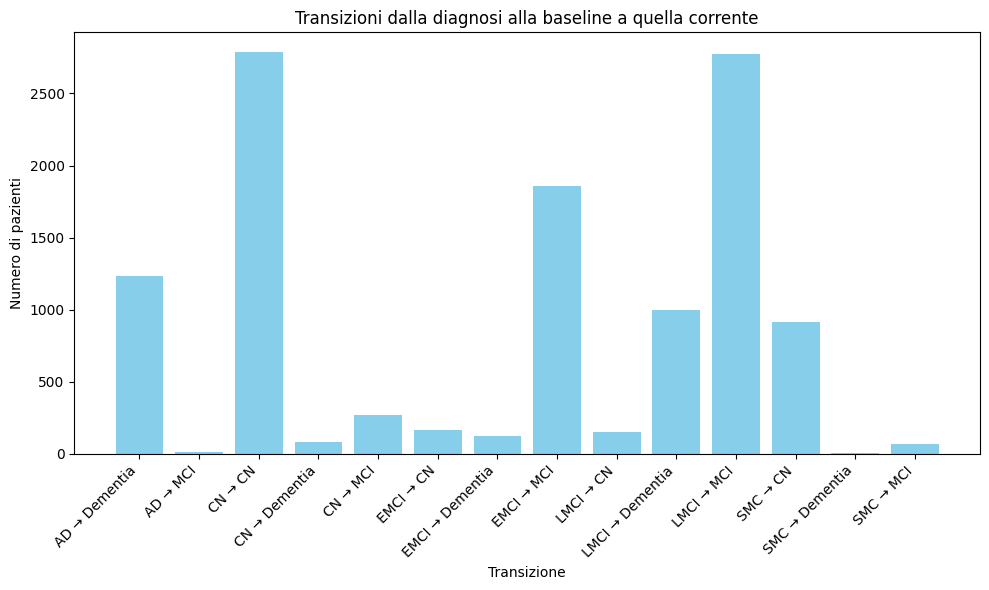

In [308]:
plt.figure(figsize=(10, 6))
plt.bar(prog['DX_bl'] + " → " + prog['DX'], prog['count'], color='skyblue')
plt.title('Transizioni dalla diagnosi alla baseline a quella corrente')
plt.xlabel('Transizione')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<b> BARPLOT DELLE CATEGORIE DI TRANSIZIONE + numero pazienti </b>

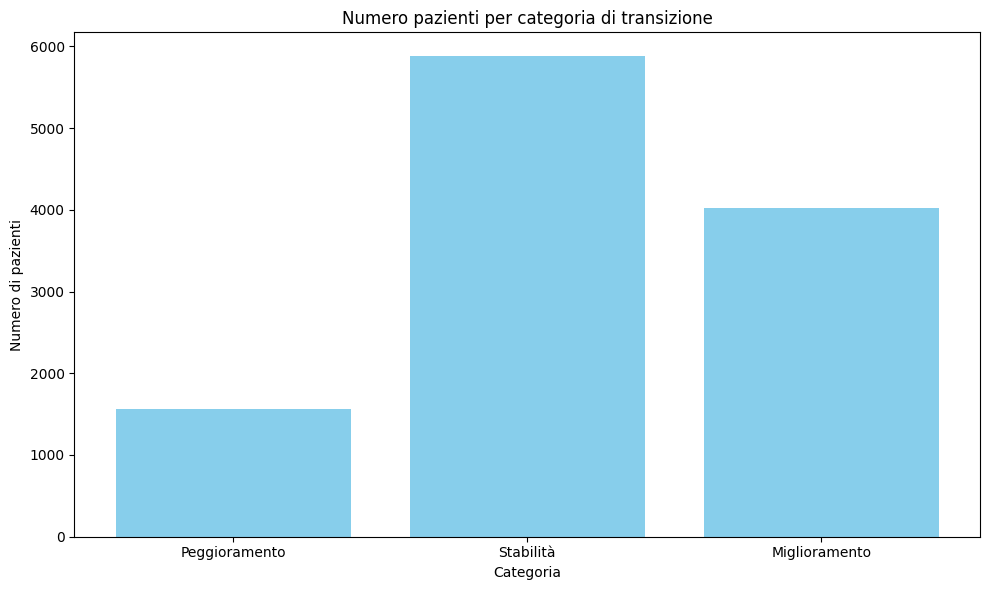

In [309]:
categorie_tran = pd.DataFrame({
    "Categoria": ["Peggioramento", "Stabilità", "Miglioramento"],
    "Conteggio": [tot_peggiorati, tot_stabili, tot_guariti]
})

plt.figure(figsize=(10, 6))
plt.bar(categorie_tran['Categoria'], categorie_tran['Conteggio'], color='skyblue')
plt.title('Numero pazienti per categoria di transizione')
plt.xlabel('Categoria')
plt.ylabel('Numero di pazienti')
plt.tight_layout()
plt.show()

<b> TABELLA DELLE TRANSIZIONI CON TEMPO MEDIO </b>

In [310]:
# conversione date in formato datetime
filtered_table['EXAMDATE'] = pd.to_datetime(filtered_table['EXAMDATE'])

# dataframe con le date di baseline per ogni paziente
bl_dataframe = filtered_table[filtered_table['VISCODE'] == 'bl'][['PTID', 'EXAMDATE']].rename(columns={'EXAMDATE': 'BASELINE_DATE'})

# merging al dataset principale
filtered_table = filtered_table.merge(bl_dataframe, on='PTID', how='left')

# calcolo tempo trascorso in giorni
filtered_table['DAYS_ELAPSED'] = (filtered_table['EXAMDATE'] - filtered_table['BASELINE_DATE']).dt.days

non_baseline = filtered_table[filtered_table['VISCODE'] != 'bl']

# raggruppamento e calcolo del tempo 
time_by_transition = non_baseline.groupby(['DX_bl', 'DX'])['DAYS_ELAPSED'].mean().reset_index()
time_by_transition['DAYS_ELAPSED'] = time_by_transition['DAYS_ELAPSED'].round().astype(int)

time_by_transition.columns = ['DX_bl', 'DX', 'Tempo_medio_giorni']

# conversione da giorni a anni 
time_by_transition['Tempo_medio_anni'] = (time_by_transition['Tempo_medio_giorni'] / 365.25).round(1)

# merging alla tabella prog
prog = prog.merge(time_by_transition[['DX_bl', 'DX', 'Tempo_medio_giorni', 'Tempo_medio_anni']], 
                 on=['DX_bl', 'DX'], 
                 how='left')

prog.to_csv("prog_with_time.csv", index=False)

print(prog.head())

  DX_bl        DX  count  Tempo_medio_giorni  Tempo_medio_anni
0    AD  Dementia   1232                 421               1.2
1    AD       MCI     13                 466               1.3
2    CN        CN   2785                1267               3.5
3    CN  Dementia     85                3218               8.8
4    CN       MCI    271                2361               6.5


C:\Users\A1149apulia\AppData\Local\Temp\ipykernel_16436\834179010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_table['EXAMDATE'] = pd.to_datetime(filtered_table['EXAMDATE'])


<b>DISTRIBUZIONE CUMULATA GENERALE DEI PAZIENTI CHE PEGGIORANO </b>

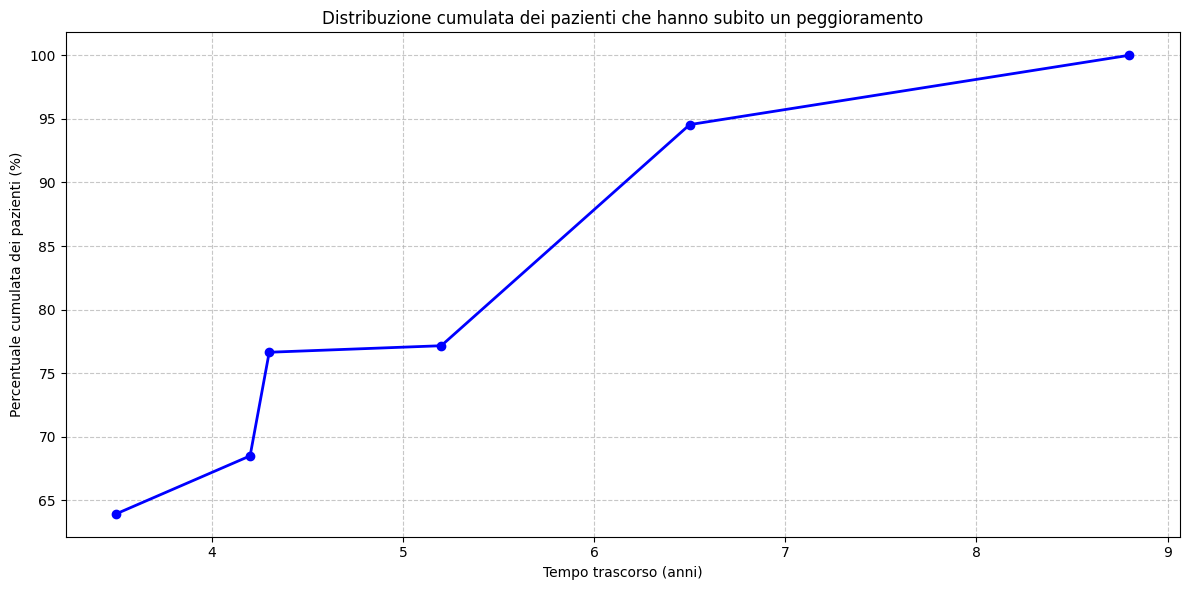

In [311]:
gravità = {
    "CN": 0,
    "SMC": 1,
    "EMCI": 2,
    "MCI": 2,
    "LMCI": 3,
    "AD": 4,
    "Dementia": 4
}

def is_progression(dx_bl, dx):
    if dx_bl not in gravità or dx not in gravità:
        return False
    return gravità[dx] > gravità[dx_bl]


# filtro solo le righe che rappresentano un peggioramento
prog['is_progression'] = prog.apply(lambda row: is_progression(row['DX_bl'], row['DX']), axis=1)
progression_data = prog[prog['is_progression']].copy()

progression_data['Transition'] = progression_data['DX_bl'] + ' → ' + progression_data['DX']

progression_data = progression_data.sort_values(by='Tempo_medio_anni')

# calcolo la percentuale cumulata rispetto al totale dei pazienti che hanno subito un peggioramento
total_progressed_patients = progression_data['count'].sum()
progression_data['perc'] = progression_data['count'] / total_progressed_patients * 100
progression_data['perc_cum'] = progression_data['perc'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(progression_data['Tempo_medio_anni'], progression_data['perc_cum'], 
         marker='o', linestyle='-', linewidth=2, color='blue')
plt.title('Distribuzione cumulata dei pazienti che hanno subito un peggioramento')
plt.xlabel('Tempo trascorso (anni)')
plt.ylabel('Percentuale cumulata dei pazienti (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La linea blu mostra come la percentuale di pazienti che peggiorano aumenta nel tempo e ogni punto rappresenta un intervallo specifico e la percentuale di pazienti peggiorati entro in lasso di tempo. Il primo punto indica che circa il 65% dei pazienti subisce un peggioramento già dopo poco più di 3 anni dalla baseline. L'incremento, dopodichè è graduale: dopo poco più di 4, quasi il 70% prima e più del 75% dopo ha subito un peggioramento; dopo poco più di 5 anni rimaniamo sotto l'80%. Dopo solo 6 anni e mezzo il 95% dei pazienti ha subito un peggioramento. Fino ad arrivare all'ultimo punto che indica come il 100% dei pazienti ha subito un peggioramento entro 9 anni. <br>
La pendenza della linea indicando la velocità con cui peggiorano, notiamo che tra 4 e 5 anni c'è un incremento significativo (dal 65% al 75%). Quindi molti peggioramenti avvengono in questo intervallo. Dopo quasi più 6 anni invece, la liena diventa più piatta e quindi i peggioramenti sono meno frequenti. Quindi quasi l'80% dei peggioramenti avviene nei primi 6 anni. 